In [1]:
# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import mglearn
import sklearn
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

In [29]:
M = np.array([[3,-1,-1],[-1.,3.,1.],[2.,1.,4.]])
print(M)

[[ 3. -1. -1.]
 [-1.  3.  1.]
 [ 2.  1.  4.]]


In [30]:
b = np.array([1.,3.,7.])
print(b)

[1. 3. 7.]


# Método de eliminación Gaussiana

1. Diagonalizar la matriz con unos en la diagonal
2. Hacer la sustiución hacia atrás $ x_{i} = \frac{b_{i} - \sum_{j = i+1}^{n} a_{ij}x_{j}}{a_{ii}} $

In [33]:
def GetGaussJordan(M_, b_):
    A = M_.copy()
    b = b_.copy()
    
    A = np.float_(A)
    b = np.float_(b)
    
    n = len(b)
    
    for i in range(n):
        # Unos en la diagonal
        a = A[i,i]
        A[i,:] = A[i,:]/a # Dividir toda la fila por el valor de la diagonal
        b[i] = b[i]/a
        
        print(A)
        for j in range(i+1, n):
            a = A[j,i] # Tomar el primer elemento de la segunda fila
            A[j,:] = A[j,:]-a*A[i,:] 
            b[j] = b[j] - a*b[i]
    
    x = b.copy()
    
    # Hacer sustitucion hacia atras
    
    for i in range(n-1,-1,-1):
        print(i)
        for j in range(i+1,n):
            x[i] = (x[i] - A[i,j]*x[j])/A[i,i]
    
    
    return x, A, b

In [34]:
Xsol, NewM, Newb = GetGaussJordan(M,b)

[[ 1.         -0.33333333 -0.33333333]
 [-1.          3.          1.        ]
 [ 2.          1.          4.        ]]
[[ 1.         -0.33333333 -0.33333333]
 [ 0.          1.          0.25      ]
 [ 0.          1.66666667  4.66666667]]
[[ 1.         -0.33333333 -0.33333333]
 [ 0.          1.          0.25      ]
 [ 0.          0.          1.        ]]
2
1
0


In [35]:
print(Newb)

[0.33333333 1.25       1.        ]


In [36]:
print(NewM)

[[ 1.         -0.33333333 -0.33333333]
 [ 0.          1.          0.25      ]
 [ 0.          0.          1.        ]]


In [37]:
print(Xsol)

[1. 1. 1.]


# Usando la inversion matricial

In [38]:
Inv_M = np.linalg.inv(M)
print(Inv_M)

[[ 0.32352941  0.08823529  0.05882353]
 [ 0.17647059  0.41176471 -0.05882353]
 [-0.20588235 -0.14705882  0.23529412]]


In [39]:
Xsol = np.dot(Inv_M,b)
print(Xsol)

[1. 1. 1.]


# Ajuste por minimos cuadrados

In [40]:
x = np.array([0,1,2,3])
y = np.array([-0.7, 0.2,1.1,2.3])

Llevar el problema a $y = Ap$, con $A = [[x \ 1]]$ y $p[[m], [b]]$

In [44]:
# Primero debemos construir la matrix A

A = np.vstack(  [x, np.ones(len(x))] ).T
print(A)

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]


In [46]:
# Fitting
m, b = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, b)

(0.9899999999999997, -0.7599999999999989)


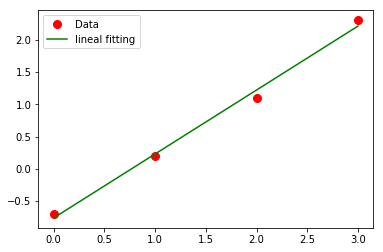

In [47]:
plt.plot(x,y,'ro', markersize=8, label='Data')
plt.plot(x, m*x+b, 'g', label='lineal fitting')
plt.legend()
plt.show()